In [3]:
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re, numpy as np, os

In [4]:
def prepare_data(path):
	"""
	:param text: raw text file
	:type text: str
	:return list of str lines, list of int labels
	"""
	raw = []    # Raw lines
	lines = []  # Tokenized
	labels = [] # Labels
	with open(path, mode="r", encoding="utf-8") as f:
		text = f.readlines()
		for line in text:
			if len(line) > 0:
				raw.append(prepare_text(line[:-3]))     # :-2 to exclude \t
				lines.append(prepare_text(line[:-3], token=True))
				labels.append(int(line[-2]))            # The label
	return raw, lines, labels


def prepare_text(text, token=False):
	return word_tokenize(re.sub(r'\W', ' ', text.lower().replace('\'',''))) \
		if token else re.sub(r'\W', ' ', text.lower().replace('\'',''))


def datafromfile(path):
	with open(path, mode="r", encoding="utf-8") as f:
		text = f.read()
		f.close()

	raw, lines, labels = prepare_data(path)
	return text, raw, lines, labels


def export_vocabulary(path, raw, vectorizer):
	"""

	:param raw: entire raw corpus text string
	:param vectorizer: pre-fit vectorizer
	:type vectorizer CountVectorizer
	:type raw list
	"""

	x = vectorizer.transform(raw)
	# [word, id, frequency]
	featurenames = vectorizer.get_feature_names()
	indices = { k : featurenames.index(k) for k in vectorizer.vocabulary_.keys()}
	vocab = [k+" "+str(indices[k])+" "+str(x[0,indices[k]])+"\n" for k,v in vectorizer.vocabulary_.items()]
	with open(path, "w") as f:
		f.writelines(vocab)
		f.close()
	return vocab


def export_data(fname, x_tokens, vectorizer, y):
	'''

	:param vectorizer:
	:type vectorizer CountVectorizer
	:return:
	'''
	out = ""
	for i in range(0, len(y)):
		for token in x_tokens[i]:
			idx = vectorizer.vocabulary_.get(token)
			if idx:
				out += str(vectorizer.vocabulary_[token])
				out += " "
		out = out[:-1] + "\t" + str(y[i]) + "\n"
	with open(fname, mode="w", encoding="utf-8") as f:
		f.write(out)
		f.close()

In [ ]:
yelp_train_raw, yelp_train_rawlines, yelp_train_tokenlines, yelp_train_y = \
	datafromfile(os.path.join("data","yelp-train.txt"))
yelp_valid_raw, yelp_valid_rawlines, yelp_valid_tokenlines, yelp_valid_y = \
	datafromfile(os.path.join("data","yelp-valid.txt"))
yelp_test_raw, yelp_test_rawlines, yelp_test_tokenlines, yelp_test_y = \
	datafromfile(os.path.join("data","yelp-test.txt"))

yelp_vectorizer_bbow = CountVectorizer(max_features=10000, binary=True)
yelp_bbow_train_x = yelp_vectorizer_bbow.fit_transform(np.array(yelp_train_rawlines))
yelp_bbow_valid_x = yelp_vectorizer_bbow.transform(np.array(yelp_valid_rawlines))
yelp_bbow_test_x = yelp_vectorizer_bbow.transform(np.array(yelp_test_rawlines))

yelp_train_y = np.array(yelp_train_y)
yelp_valid_y = np.array(yelp_valid_y)
yelp_test_y = np.array(yelp_test_y)

yelp_vectorizer = CountVectorizer(max_features=10000)
yelp_fbow_train_x = yelp_vectorizer.fit_transform(np.array(yelp_train_rawlines))
yelp_fbow_valid_x = yelp_vectorizer.transform(np.array(yelp_valid_rawlines))
yelp_fbow_test_x = yelp_vectorizer.transform(np.array(yelp_test_rawlines))


In [ ]:
IMDB_train_raw, IMDB_train_rawlines, IMDB_train_tokenlines, IMDB_train_y = \
	datafromfile(os.path.join("data","IMDB-train.txt"))
IMDB_valid_raw, IMDB_valid_rawlines, IMDB_valid_tokenlines, IMDB_valid_y = \
	datafromfile(os.path.join("data","IMDB-valid.txt"))
IMDB_test_raw, IMDB_test_rawlines, IMDB_test_tokenlines, IMDB_test_y = \
	datafromfile(os.path.join("data","IMDB-test.txt"))

IMDB_vectorizer_bbow = CountVectorizer(max_features=10000, binary=True)
IMDB_bbow_train_x = IMDB_vectorizer_bbow.fit_transform(np.array(IMDB_train_rawlines))
IMDB_bbow_valid_x = IMDB_vectorizer_bbow.transform(np.array(IMDB_valid_rawlines))
IMDB_bbow_test_x = IMDB_vectorizer_bbow.transform(np.array(IMDB_test_rawlines))

IMDB_train_y = np.array(IMDB_train_y)
IMDB_valid_y = np.array(IMDB_valid_y)
IMDB_test_y = np.array(IMDB_test_y)

IMDB_vectorizer_fbow = CountVectorizer(max_features=10000)
IMDB_fbow_train_x = IMDB_vectorizer_fbow.fit_transform(np.array(IMDB_train_rawlines))
IMDB_fbow_valid_x = IMDB_vectorizer_fbow.transform(np.array(IMDB_valid_rawlines))
IMDB_fbow_test_x = IMDB_vectorizer_fbow.transform(np.array(IMDB_test_rawlines))


In [8]:
from sklearn.dummy import DummyClassifier

In [9]:
randomClassifier = DummyClassifier(strategy="uniform")
majorityClassifier = DummyClassifier(strategy="most_frequent")

In [10]:
randomClassifier.fit(IMDB_bbow_train_x, IMDB_train_y)
majorityClassifier.fit(IMDB_bbow_train_x, IMDB_train_y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [11]:
from sklearn.metrics import f1_score

In [12]:
IMDB_bbow_test_pred = randomClassifier.predict(IMDB_bbow_test_x)
print(f1_score(IMDB_test_y,IMDB_bbow_test_pred))

0.5056697519733943


In [13]:
IMDB_bbow_test_pred = majorityClassifier.predict(IMDB_bbow_test_x)
print(f1_score(IMDB_test_y,IMDB_bbow_test_pred))

0.0


C:\Program Files\Python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid

In [17]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [62]:
params_bnb = ParameterGrid({
    'alpha' : np.logspace(0,3,10)
})
params_gnb = ParameterGrid({
    'var_smoothing' : np.logspace(-9, 1, 10)
})
params_svc = ParameterGrid({
    'loss' : ['squared_hinge'],
	'dual' : [False, True],
	'C' : np.logspace(-1, 1, 5)
})
depths = [None]
depths.extend(np.logspace(0, 2, 5).tolist())
maxfeatures = [None, 'auto', 'sqrt', 'log2']
params_tree = ParameterGrid({
	'criterion' : ['gini', 'entropy'],
	'max_depth' : depths,
    'splitter' : ['best', 'random'],
    'max_features' : maxfeatures
})

In [65]:
print(params_bnb.param_grid, params_gnb.param_grid, params_svc.param_grid, params_tree.param_grid, sep='\n')

[{'alpha': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])}]
[{'var_smoothing': array([1.00000000e-09, 1.29154967e-08, 1.66810054e-07, 2.15443469e-06,
       2.78255940e-05, 3.59381366e-04, 4.64158883e-03, 5.99484250e-02,
       7.74263683e-01, 1.00000000e+01])}]
[{'loss': ['squared_hinge'], 'dual': [False, True], 'C': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ])}]
[{'criterion': ['gini', 'entropy'], 'max_depth': [None, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0], 'splitter': ['best', 'random'], 'max_features': [None, 'auto', 'sqrt', 'log2']}]


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    7.9s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


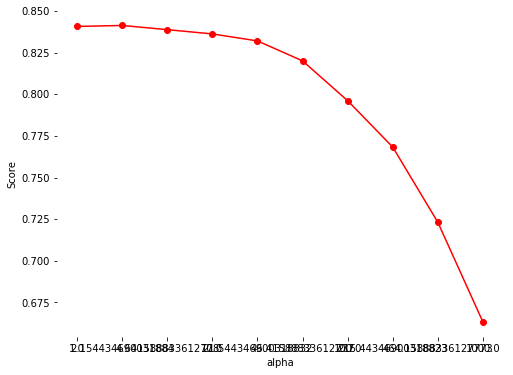

In [66]:
best_bbow_nb, best_bbow_nb_score_valid, all_models, all_scores = pf.bestFit(
    BernoulliNB, params_bnb, IMDB_bbow_train_x, IMDB_train_y, IMDB_bbow_valid_x, IMDB_valid_y, metric=f1_score)

In [67]:
print(best_bbow_nb, best_bbow_nb_score_valid, all_models, all_scores, sep='\n')

BernoulliNB(alpha=2.154434690031884, binarize=0.0, class_prior=None,
      fit_prior=True)
0.8413021363173957
[BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=2.154434690031884, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=4.641588833612778, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=21.544346900318832, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=46.41588833612777, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=100.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=215.44346900318823, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=464.15888336127773, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=1000.0, binarize=0.0, class_prior=None, fit_prior=True)]
[0.8407268297634758, 0.8413021363173957,

-------------FITTING MODELS-------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.8s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   26.0s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   29.7s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.5s remaining:    0.0s


-------------SCORING MODELS-------------
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   49.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


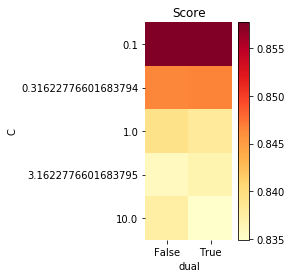

In [68]:
best_bbow_svc, best_bbow_svc_score_valid, all_models, all_scores = pf.bestFit(
    LinearSVC, params_svc, IMDB_bbow_train_x, IMDB_train_y, IMDB_bbow_valid_x, IMDB_valid_y, metric=f1_score, n_jobs=1)

In [69]:
print(best_bbow_svc, best_bbow_svc_score_valid, all_models, all_scores, sep='\n')

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.8577142285771424
[LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=True,
     fit_intercept=True, intercept_

In [70]:
best_bbow_tree, best_bbow_tree_score_valid, all_models, all_scores = pf.bestFit(
    DecisionTreeClassifier, params_tree, IMDB_bbow_train_x, IMDB_train_y, IMDB_bbow_valid_x, IMDB_valid_y, metric=f1_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   26.8s


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   27.1s


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   27.6s


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   39.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


Too many dimensions to plot.


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.1s finished


In [72]:
print(best_bbow_tree, best_bbow_tree_score_valid, all_models, all_scores, sep='\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7514430014430014
[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le

In [73]:
print("Best BerNB F1:", f1_score(IMDB_test_y, best_bbow_nb.predict(IMDB_bbow_test_x)))
print("Best LinSVC F1:", f1_score(IMDB_test_y, best_bbow_svc.predict(IMDB_bbow_test_x)))
print("Best D-tree F1:", f1_score(IMDB_test_y, best_bbow_tree.predict(IMDB_bbow_test_x)))

Best BerNB F1: 0.8300405059105563
Best LinSVC F1: 0.8490452744085506
Best D-tree F1: 0.7557849897115628


In [74]:
best_fbow_NB, best_fbow_NB_score, all_models, all_scores = pf.bestFit(
    GaussianNB, params_gnb, IMDB_fbow_train_x, IMDB_train_y, IMDB_fbow_valid_x, IMDB_valid_y, metric=f1_score)

NameError: name 'IMDB_train_x' is not defined

In [ ]:
best_fbow_svc, best_fbow_svc_score, all_models, all_scores = pf.bestFit(
    LinearSVC, params_svc, IMDB_fbow_train_x, IMDB_train_y, IMDB_fbow_valid_x, IMDB_valid_y, metric=f1_score, n_jobs=1)

In [ ]:
best_fbow_tree, best_fbow_tree_score, all_models, all_scores = pf.bestFit(
    DecisionTreeClassifier, params_tree, IMDB_fbow_train_x, IMDB_train_y, IMDB_fbow_valid_x, IMDB_valid_y, metric=f1_score)